# Dirchlet Process Simulator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Mixture Model

In [9]:
# Stick Breaking. Construction
class DirchletProcess():
    def __init__(self, alpha, G):
        self.sticks_used = 0
        self.alpha = alpha
        self.G = G
    
    def __call__(self):
        remaining_stick = 1 - self.sticks_used
        v = np.random.beta(1, self.alpha) * remaining_stick
        self.sticks_used += v
        mu = self.G(np.zeros(2), 10 * np.eye(2))
        return mu, v
    
    def sample(self):
        self.sticks_used = 0
        probs = []
        remaining_stick = 1
        while not (remaining_stick == 0):
            _, p = self()
            remaining_stick = 1 - self.sticks_used
            probs.append(p)
        return probs

In [10]:
# There should be better way to do this...
def which_color(index):
    colors = ['r','g','b','c', 'm']
    return colors[index % len(colors)]

In [11]:
# dp parameters
cluster_means = [np.zeros(2)]
cluster_probs = [0]

G = np.random.multivariate_normal
G_params = [np.zeros(2), 5 * np.eye(2)]
dp = DirchletProcess(0.5, G)

In [5]:
# Sampling a Mixture Model
for i in range (1,100):
    unif_samp = np.random.uniform(0,1)
    cumsum = np.cumsum(cluster_probs).tolist()
    while (cumsum[-1] < unif_samp):
        mu, p = dp()
        cluster_means.append(mu)
        cluster_probs.append(p)
        cumsum = np.cumsum(cluster_probs).tolist()
        
        # Plot Mean
        plt.scatter(mu[0], mu[1], 20, c=which_color(len(cumsum) - 1))
        
    prob = next(i for i in cumsum if i >= unif_samp)
    index = cumsum.index(prob)
    
    # Generate Data
    sample = G(cluster_means[index], np.eye(2))
    plt.scatter(sample[0], sample[1], 2, c=which_color(index))

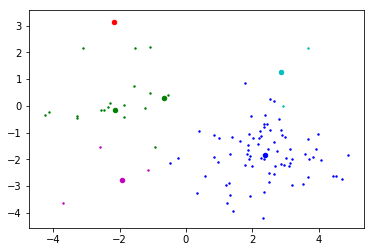

In [6]:
plt.show()